In [10]:
import pandas as pd 
import numpy as np 

from scipy.stats import norm, powerlaw

import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv('dataset.csv',index_col=0)

# Analysis

In [5]:
df.head(5)

,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,cmlt_final_level,cmlt_count_grind,cmlt_max_grind,cmlt_count_won_grind,cmlt_hard_buy,cmlt_hard_earn,cmlt_hard_gift,cmlt_hard_spent,cmlt_hard_max_spent,country,country_top_tier,network_name,date_install,first_command_time,cmlt_time_4grind,cmlt_time_with_us_4grind,cmlt_avg_time_for_level,cmlt_avg_duration,cmlt_avg_grind_duration,cmlt_winrate,cmlt_spent_hc_per_grind,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,birthday,sex,is_cheater,has_email,time_confirm_email,target_game_currency
0,0.0,0,117,234,2,0,0,0,0,1,0,0,0,0,0,15,0,0,RU,0,NaN,2021-03-13,2021-02-07 10:41:50.0,0.000000,0.000000,234.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
1,0.0,125,668,668,1,1448,4,271,28,1,2,2,2,0,0,15,0,0,MD,0,Facebook Installs,2021-04-22,2021-03-19 23:02:10.0,0.002994,0.016000,668.000000,668.000000,334.000000,1.000000,0.000000,0.000000,62.500000,0.000000,NaN,NaN,False,False,NaN,0.0
2,0.0,14070,4137,15551,12,41220,119,796,275,6,67,69,24,0,5,15,20,16,US,1,Organic,2021-03-24,2021-02-18 19:55:22.0,0.004308,0.004762,2591.833333,1295.916667,232.104478,0.358209,0.298507,0.298507,210.000000,2.857143,1935-10-22,female,False,False,NaN,0.0
3,0.0,0,290,290,1,176,2,44,3,1,1,1,1,0,0,30,0,0,BR,0,Organic,2021-03-25,2021-02-19 16:09:34.0,0.003448,0.000000,290.000000,290.000000,290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1987-08-08,female,False,True,NaN,0.0
4,0.0,887,1002,1002,1,2448,12,123,121,4,7,7,7,0,2,15,0,0,RU,0,Vungle,2021-04-01,2021-02-26 07:45:15.0,0.006986,0.007892,250.500000,1002.000000,143.142857,1.000000,0.000000,0.000000,126.714286,0.000000,NaN,NaN,False,False,NaN,0.0


In [6]:
len(df.columns)

39

In [7]:
df.shape

(250006, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250006 entries, 0 to 250005
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cmlt_daily_game_currency       250006 non-null  float64
 1   cmlt_seconds_with_us           250006 non-null  int64  
 2   cmlt_max_sessions_duration     250006 non-null  int64  
 3   cmlt_sum_sessions_duration     250006 non-null  int64  
 4   cmlt_count_sessions            250006 non-null  int64  
 5   cmlt_sum_quantum_duration      250006 non-null  int64  
 6   cmlt_count_quant               250006 non-null  int64  
 7   cmlt_max_quantum_duration      250006 non-null  int64  
 8   cmlt_max_quant                 250006 non-null  int64  
 9   cmlt_final_level               250006 non-null  int64  
 10  cmlt_count_grind               250006 non-null  int64  
 11  cmlt_max_grind                 250006 non-null  int64  
 12  cmlt_count_won_grind           2500

In [9]:
df['target_game_currency'].nunique()

2713

In [10]:
df['target_game_currency'].value_counts()

target_game_currency
0.00        240920
94.05         2200
283.10         424
189.05         422
568.10         168
             ...  
89256.30         1
41794.30         1
25715.55         1
33691.75         1
37386.30         1
Name: count, Length: 2713, dtype: int64

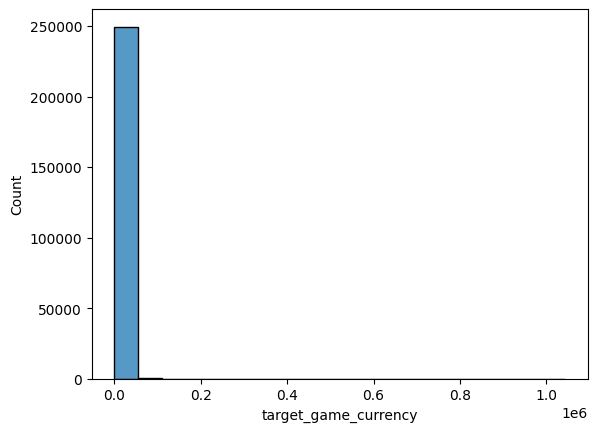

In [11]:
sns.histplot(df['target_game_currency'])
plt.show()

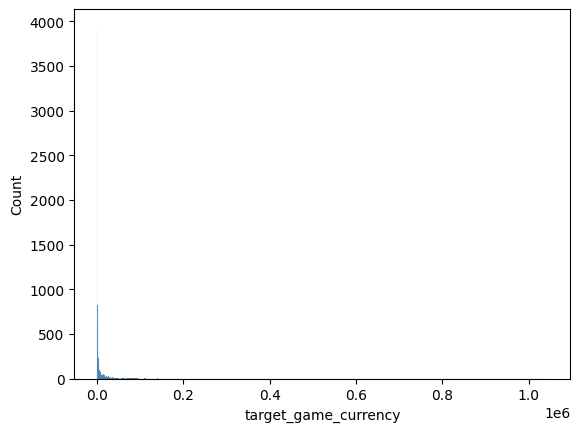

In [20]:
sns.histplot(df.query('target_game_currency>0.0')['target_game_currency'])
plt.show()

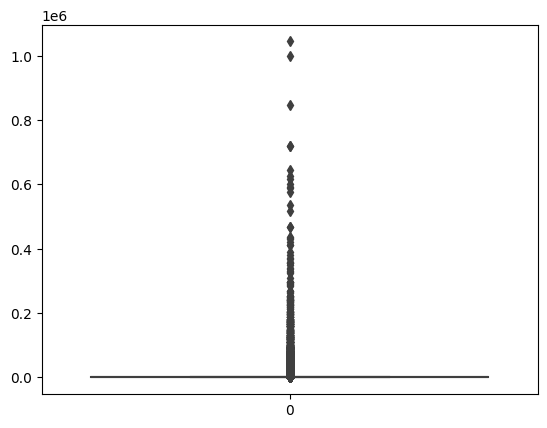

In [29]:
sns.boxplot(df['target_game_currency'])
plt.show()

In [35]:
df[['target_game_currency']].describe()

,target_game_currency
count,2.500060e+05
mean,4.783516e+02
std,8.782120e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.044268e+06


In [4]:
df.describe(include='all')

,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,cmlt_final_level,cmlt_count_grind,cmlt_max_grind,cmlt_count_won_grind,cmlt_hard_buy,cmlt_hard_earn,cmlt_hard_gift,cmlt_hard_spent,cmlt_hard_max_spent,country,country_top_tier,network_name,date_install,first_command_time,cmlt_time_4grind,cmlt_time_with_us_4grind,cmlt_avg_time_for_level,cmlt_avg_duration,cmlt_avg_grind_duration,cmlt_winrate,cmlt_spent_hc_per_grind,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,birthday,sex,is_cheater,has_email,time_confirm_email,target_game_currency
count,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,2.500060e+05,2.500060e+05,249950,250006.000000,224850,250006,250006,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,250006.000000,2.500060e+05,2.500060e+05,250006.000000,2.500060e+05,64243,63041,244347,244347,4234,2.500060e+05
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,13,90,245466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21972,3,2,2,4110,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,NaN,Organic,2021-02-18,2021-02-11 10:01:01.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973-06-05,female,False,False,2021-12-04 12:53:13.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50397,NaN,170179,6374,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,37821,244156,205316,10,NaN
mean,34.292041,33960.597330,2450.241610,9583.622937,5.331756,25140.172560,79.080718,314.431366,304.991020,6.233966,44.002416,112.593694,29.681140,5.623445,5.227767,14.245014,8.451479e+03,8.445564e+03,NaN,0.493296,NaN,NaN,NaN,0.005916,0.008280,1018.602076,1445.571733,193.668030,0.703148,8.413403e+03,8.413403e+03,430.247223,1.442863e+03,NaN,NaN,NaN,NaN,NaN,4.783516e+02
std,654.358101,73713.498159,4697.404027,19053.876939,8.452232,47450.271153,138.372150,715.251877,461.380456,8.418643,77.639872,470.382938,47.596697,117.263139,7.509561,5.185956,4.200014e+06,4.200013e+06,NaN,0.499956,NaN,NaN,NaN,0.159049,0.299056,1820.324953,2326.942912,584.202320,0.372332,4.199972e+06,4.199972e+06,918.680315,7.002800e+05,NaN,NaN,NaN,NaN,NaN,8.782120e+03
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.081967,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,0.000000,66.000000,266.000000,322.000000,1.000000,440.000000,4.000000,68.000000,28.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,15.000000,0.000000e+00,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,0.003119,0.000108,209.000000,239.000000,118.155729,0.518750,0.000000e+00,0.000000e+00,26.666667,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,0.000000,1511.500000,1086.000000,1707.000000,2.000000,3684.000000,16.000000,166.000000,127.000000,4.000000,9.000000,10.000000,8.000000,0.000000,2.000000,15.000000,0.000000e+00,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,0.005128,0.002156,474.000000,829.500000,164.726946,0.888889,0.000000e+00,0.000000e+00,137.600000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,0.000000,26246.500000,2989.000000,9923.000000,6.000000,26324.000000,89.000000,316.000000,428.000000,8.000000,49.000000,62.000000,38.000000,0.000000,8.000000,15.000000,9.000000e+00,7.000000e+00,NaN,1.000000,NaN,NaN,NaN,0.006574,0.007294,1296.833333,1877.000000,214.363636,1.000000,1.182036e-01,1.182036e-01,468.496055,2.285714e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [22]:
df['cat_col_target']  = df['target_game_currency'].apply(lambda x: 1 if x>0.0 else 0 )
df['log_col_target']  = df['target_game_currency'].apply(lambda x: np.log(x) )

In [14]:
df.head(5)

,cmlt_daily_game_currency,cmlt_seconds_with_us,cmlt_max_sessions_duration,cmlt_sum_sessions_duration,cmlt_count_sessions,cmlt_sum_quantum_duration,cmlt_count_quant,cmlt_max_quantum_duration,cmlt_max_quant,cmlt_final_level,cmlt_count_grind,cmlt_max_grind,cmlt_count_won_grind,cmlt_hard_buy,cmlt_hard_earn,cmlt_hard_gift,cmlt_hard_spent,cmlt_hard_max_spent,country,country_top_tier,network_name,date_install,first_command_time,cmlt_time_4grind,cmlt_time_with_us_4grind,cmlt_avg_time_for_level,cmlt_avg_duration,cmlt_avg_grind_duration,cmlt_winrate,cmlt_spent_hc_per_grind,cmlt_spent_hc_div_active_time,cmlt_seconds_div_active_time,cmlt_hard_med_spent,birthday,sex,is_cheater,has_email,time_confirm_email,target_game_currency,cat_col_target,log_col_target
0,0.0,0,117,234,2,0,0,0,0,1,0,0,0,0,0,15,0,0,RU,0,NaN,2021-03-13,2021-02-07 10:41:50.0,0.000000,0.000000,234.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0,-inf
1,0.0,125,668,668,1,1448,4,271,28,1,2,2,2,0,0,15,0,0,MD,0,Facebook Installs,2021-04-22,2021-03-19 23:02:10.0,0.002994,0.016000,668.000000,668.000000,334.000000,1.000000,0.000000,0.000000,62.500000,0.000000,NaN,NaN,False,False,NaN,0.0,0,-inf
2,0.0,14070,4137,15551,12,41220,119,796,275,6,67,69,24,0,5,15,20,16,US,1,Organic,2021-03-24,2021-02-18 19:55:22.0,0.004308,0.004762,2591.833333,1295.916667,232.104478,0.358209,0.298507,0.298507,210.000000,2.857143,1935-10-22,female,False,False,NaN,0.0,0,-inf
3,0.0,0,290,290,1,176,2,44,3,1,1,1,1,0,0,30,0,0,BR,0,Organic,2021-03-25,2021-02-19 16:09:34.0,0.003448,0.000000,290.000000,290.000000,290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1987-08-08,female,False,True,NaN,0.0,0,-inf
4,0.0,887,1002,1002,1,2448,12,123,121,4,7,7,7,0,2,15,0,0,RU,0,Vungle,2021-04-01,2021-02-26 07:45:15.0,0.006986,0.007892,250.500000,1002.000000,143.142857,1.000000,0.000000,0.000000,126.714286,0.000000,NaN,NaN,False,False,NaN,0.0,0,-inf


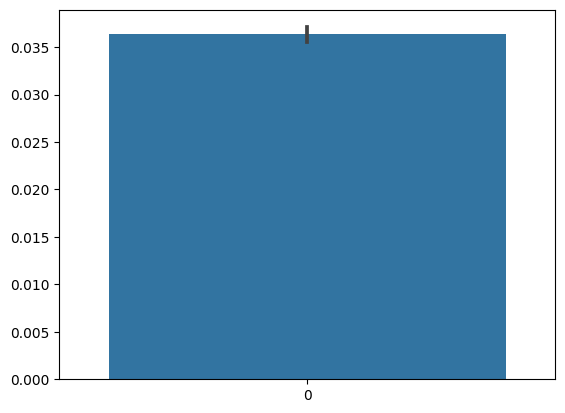

In [15]:
sns.barplot(df['cat_col_target'])
plt.show()

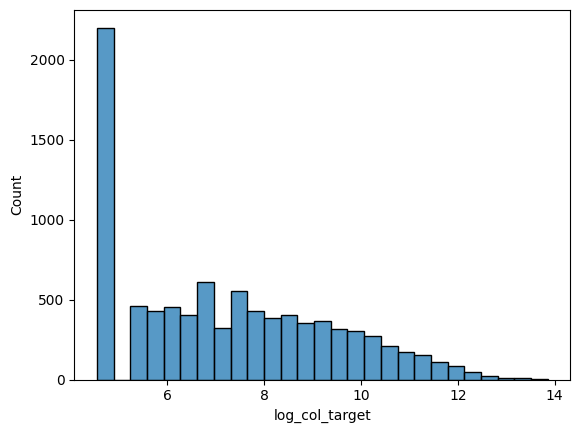

In [16]:
sns.histplot(df['log_col_target'])
plt.show()

<Axes: xlabel='log_col_target', ylabel='Count'>

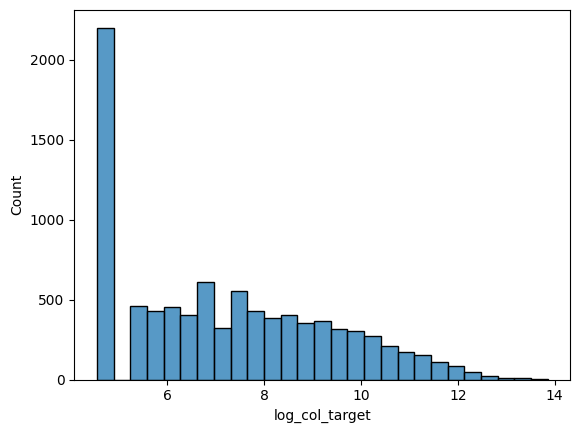

In [23]:
sns.histplot(df.query('target_game_currency>0.0')['log_col_target'])